In [163]:
using Random, Colors,  Plots, StatsBase

## Symbols
L - size of matrix <br>
K - monte carlo steps <br>
K0 - termalisation steps <br>
T - temperature <br>
J - constant of influence <br>
kB - boltzman constans
## Mathematical formulas
Average spin value:
$$m = \frac{1}{L^2}\sum_{i,j=1}^{L^2}S_{i,j}$$
Magnetisation:
$$\langle m\rangle = \frac{1}{l_{sym}}\sum_{j=1}^{l_{sym}}|m_j|$$
Magnetic susceptibility:
$$\chi = \frac{L^2}{k_B T}(\langle m^2\rangle -\langle m\rangle^2 )$$

#   Spin configuration for L = 10, L = 100 and T = 1, T=2.26, T=4

In [322]:
function spin_configuration(K,L,T,J=1,kB=1)
    plots=[]
    magnetisation = []
    
    init_random = rand([-1, 1], L, L) #generating initial state
    
    S=zeros(Int64, L+2, L+2)         #generating helpful matrix
    for i in 1:L
        for j in 1:L
            S[i+1,j+1] = init_random[i,j]
        end
    end
    
    for MCS in 1:K
        for step in 1:L^2         #draw a spin
            i = rand(2:L+1)
            j = rand(2:L+1)
            
            dE = 2*J*S[i,j]*(S[i-1,j]+S[i+1,j]+S[i,j-1]+S[i,j+1])  #delta energy
            
            if dE<=0                        #changing spin
                S[i,j] = -S[i,j]
            else
                x = rand()
                if x < exp(-dE/(kB*T))
                    S[i,j] = -S[i,j]
                end
            end
        end
        
        
        if MCS in [1,floor(K/5),2*floor(K/5),3*floor(K/5),K-1]   #colecting data for plots
            #println("ok")
            push!(plots,copy(S))
        end
            
#        if mod(MCS,10000) == 0               #checking Monte Carlo step
#            print(MCS)
#        end
            
        m = sum(copy(S))/L^2         #magnetisation
        append!(magnetisation,m)
    end
    return plots, magnetisation
end

spin_configuration (generic function with 3 methods)

In [20]:
K=10^6
L=10
conf_10_1,mag_10_1 = spin_configuration(K,L,1)
conf_10_2,mag_10_2 = spin_configuration(K,L,2.26)
conf_10_4,mag_10_4 = spin_configuration(K,L,4)

K=10^6
L=100
conf_100_1,mag_100_1 = spin_configuration(K,L,1)
conf_100_2,mag_100_2 = spin_configuration(K,L,2.26)
conf_100_4,mag_100_4 = spin_configuration(K,L,4)

ok
100002000030000400005000060000700008000090000100000110000120000130000140000150000160000170000180000190000ok
200000210000220000230000240000250000260000270000280000290000300000310000320000330000340000350000360000370000380000390000ok
400000410000420000430000440000450000460000470000480000490000500000510000520000530000540000550000560000570000580000590000ok
600000610000620000630000640000650000660000670000680000690000700000710000720000730000740000750000760000770000780000790000800000810000820000830000840000850000860000870000880000890000900000910000920000930000940000950000960000970000980000990000ok
1000000ok
100002000030000400005000060000700008000090000100000110000120000130000140000150000160000170000180000190000ok
200000210000220000230000240000250000260000270000280000290000300000310000320000330000340000350000360000370000380000390000ok
400000410000420000430000440000450000460000470000480000490000500000510000520000530000540000550000560000570000580000590000ok
600000610000620000630000640000650000

(Any[[0 0 … 0 0; 0 -1 … 1 0; … ; 0 -1 … 1 0; 0 0 … 0 0], [0 0 … 0 0; 0 -1 … -1 0; … ; 0 -1 … -1 0; 0 0 … 0 0], [0 0 … 0 0; 0 1 … 1 0; … ; 0 -1 … 1 0; 0 0 … 0 0], [0 0 … 0 0; 0 -1 … 1 0; … ; 0 -1 … 1 0; 0 0 … 0 0], [0 0 … 0 0; 0 1 … -1 0; … ; 0 1 … 1 0; 0 0 … 0 0]], Any[-0.0122, -0.014, 0.0044, 0.0126, 0.0054, 0.0122, -0.0088, -0.0114, -0.0066, -0.0042  …  -0.031, -0.028, -0.0336, -0.045, -0.0294, -0.0276, -0.047, -0.0516, -0.0348, -0.0158])

In [21]:
plots=[conf_10_1,conf_10_2,conf_10_4,conf_100_1,conf_100_2,conf_100_4]

6-element Vector{Vector{Any}}:
 [[0 0 … 0 0; 0 1 … 1 0; … ; 0 -1 … -1 0; 0 0 … 0 0], [0 0 … 0 0; 0 1 … 1 0; … ; 0 1 … 1 0; 0 0 … 0 0], [0 0 … 0 0; 0 1 … 1 0; … ; 0 1 … 1 0; 0 0 … 0 0], [0 0 … 0 0; 0 1 … 1 0; … ; 0 1 … 1 0; 0 0 … 0 0], [0 0 … 0 0; 0 1 … 1 0; … ; 0 -1 … 1 0; 0 0 … 0 0]]
 [[0 0 … 0 0; 0 -1 … -1 0; … ; 0 -1 … 1 0; 0 0 … 0 0], [0 0 … 0 0; 0 1 … -1 0; … ; 0 1 … -1 0; 0 0 … 0 0], [0 0 … 0 0; 0 -1 … 1 0; … ; 0 -1 … 1 0; 0 0 … 0 0], [0 0 … 0 0; 0 1 … 1 0; … ; 0 1 … -1 0; 0 0 … 0 0], [0 0 … 0 0; 0 1 … -1 0; … ; 0 -1 … 1 0; 0 0 … 0 0]]
 [[0 0 … 0 0; 0 1 … 1 0; … ; 0 1 … 1 0; 0 0 … 0 0], [0 0 … 0 0; 0 1 … 1 0; … ; 0 1 … 1 0; 0 0 … 0 0], [0 0 … 0 0; 0 1 … 1 0; … ; 0 -1 … -1 0; 0 0 … 0 0], [0 0 … 0 0; 0 1 … 1 0; … ; 0 -1 … -1 0; 0 0 … 0 0], [0 0 … 0 0; 0 1 … -1 0; … ; 0 -1 … -1 0; 0 0 … 0 0]]
 [[0 0 … 0 0; 0 1 … 1 0; … ; 0 1 … -1 0; 0 0 … 0 0], [0 0 … 0 0; 0 1 … 1 0; … ; 0 1 … 1 0; 0 0 … 0 0], [0 0 … 0 0; 0 1 … 1 0; … ; 0 1 … 1 0; 0 0 … 0 0], [0 0 … 0 0; 0 1 … 1 0; … ; 0 1 … 1 0; 0 

In [22]:
new_plots=[]                         #cleaning matrices
for conf in plots
    x=copy(length(conf))
    y=[]
    for i in 1:x
        a=conf[i]
        a = a[2:(end-1), 2:(end-1)]
        push!(y,a)
    end
    push!(new_plots,y)
end

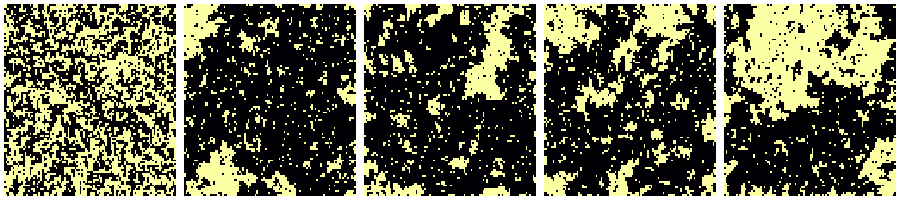

In [323]:
p1=heatmap(new_plots[5][1],size=(200, 200),cbar=false,showaxis = false)
p2=heatmap(new_plots[5][2],size=(200, 200),cbar=false,showaxis = false)
p3=heatmap(new_plots[5][3],size=(200, 200),cbar=false,showaxis = false)
p4=heatmap(new_plots[5][4],size=(200, 200),cbar=false,showaxis = false)
p5=heatmap(new_plots[5][5],size=(200, 200),cbar=false,showaxis = false)
p=[p1,p2,p3,p4,p5]
plot(p..., layout = (1,5), colorbar = false, size = (900,200))

# Single trajectories for temperatures T = 1.7 for every L

In [315]:
T = 1.7                       #temperatures
L = [10, 50, 100]             #sizes
K = 10000                   #Monte Carlo steps

10000

In [320]:
trajectories=[]
for i in 1:10
    for l in L
        push!(trajectories,spin_configuration(K,l,T)[2])
        print("OK")
    end
end 

OKOKOKOKOKOKOKOKOKOKOKOKOKOKOKOKOKOKOKOKOKOKOKOKOKOKOKOKOKOK

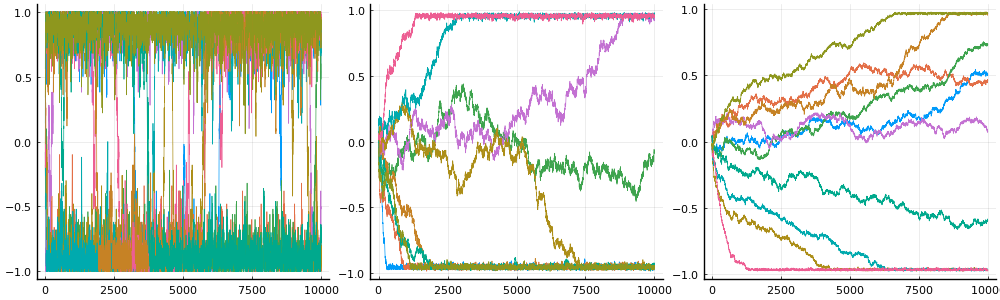

In [321]:
plot(trajectories,layout=(1,3),size = (1000,300),labels=false,linewidth=0.5)

 # Magnetization as a function of temperature  T ∈ (1, 3.5)

In [196]:
T = LinRange(1,3.5,10)         #temperatures
L = [10, 50, 100]              #sizes
K = 1000000                    #Monte Carlo steps

1000000

In [156]:
# collecting magnetisation data
function magnetisation(K,L,T,J=1,kB=1,K0=10000)
    magnetisation_data=[]
    for l in L
        mag=[]
        for t in T
            m = spin_configuration(K,l,t)[2]
            m=m[K0:end]
            print(length(m))
            for i in 1:length(m)
                m[i]=abs(m[i])
            end
            push!(mag,mean(m))
        end
        push!(magnetisation_data,mag)
    end
    return magnetisation_data
end

mag = magnetisation(K,L,T)

ok
100002000030000400005000060000700008000090000100000110000120000130000140000150000160000170000180000190000ok
200000210000220000230000240000250000260000270000280000290000300000310000320000330000340000350000360000370000380000390000ok
400000410000420000430000440000450000460000470000480000490000500000510000520000530000540000550000560000570000580000590000ok
600000610000620000630000640000650000660000670000680000690000700000710000720000730000740000750000760000770000780000790000800000810000820000830000840000850000860000870000880000890000900000910000920000930000940000950000960000970000980000990000ok
1000000aaaaaaaaaaaa10000990001ok
100002000030000400005000060000700008000090000100000110000120000130000140000150000160000170000180000190000ok
200000210000220000230000240000250000260000270000280000290000300000310000320000330000340000350000360000370000380000390000ok
400000410000420000430000440000450000460000470000480000490000500000510000520000530000540000550000560000570000580000590000ok
6000006100006

100002000030000400005000060000700008000090000100000110000120000130000140000150000160000170000180000190000ok
200000210000220000230000240000250000260000270000280000290000300000310000320000330000340000350000360000370000380000390000ok
400000410000420000430000440000450000460000470000480000490000500000510000520000530000540000550000560000570000580000590000ok
600000610000620000630000640000650000660000670000680000690000700000710000720000730000740000750000760000770000780000790000800000810000820000830000840000850000860000870000880000890000900000910000920000930000940000950000960000970000980000990000ok
1000000aaaaaaaaaaaa10000990001ok
100002000030000400005000060000700008000090000100000110000120000130000140000150000160000170000180000190000ok
200000210000220000230000240000250000260000270000280000290000300000310000320000330000340000350000360000370000380000390000ok
400000410000420000430000440000450000460000470000480000490000500000510000520000530000540000550000560000570000580000590000ok
6000006100006200

3-element Vector{Any}:
 Any[0.9946335609762034, 0.9763829127445383, 0.9221593311521954, 0.7780397999597984, 0.5418956748528537, 0.36709136657437735, 0.27159948323284533, 0.22082751431564224, 0.19125730176030142, 0.17117043316117878]
 Any[0.9986922946542379, 0.9927762594179207, 0.9746902413229884, 0.9267883559713574, 0.746765645691267, 0.16073617865032458, 0.07601444200561414, 0.054150712170997824, 0.04411015261600747, 0.03833373340026929]
 Any[0.9990058125193798, 0.9350762191149314, 0.9790541213594731, 0.9374441395513741, 0.8127980189919, 0.09265859206202821, 0.03948489102536259, 0.027864899732424512, 0.022485810014333318, 0.019457327012800996]

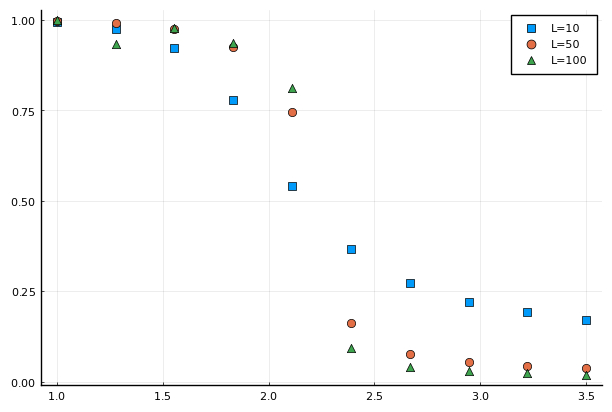

In [227]:
Plots.scatter(T,mag,markershape=[:square :circle :utriangle],markerstrokewidth=0.5,labels=["L=10" "L=50" "L=100"],markersize = 6)
png("magnetisation")

# Magnetic susceptibility as a function of temperature T ∈(1, 3.5)

In [274]:
T = LinRange(1,3.5,12)         #temperatures
L = [10, 50, 100]              #sizes
K = 1000000                   #Monte Carlo steps

1000000

In [ ]:
#collecting susceptibility data

function susceptibility(K,L,T,J=1,kB=1,K0=10000)
    susceptibility_data=[]
    for l in L
        sus = []
        for t in T
            s = spin_configuration(K,l,t)[2]
            s = s[K0:end]
            s1 = []
            s2 = []
            for i in 1:length(s)
                push!(s1,s[i]^2)
                push!(s2,abs(s[i]))
            end
            s1 = mean(s1)
            s2 = mean(s2)^2
            chi = (l^2/(kB*t)) * (s1 - s2)   #susceptibility
            push!(sus, chi)
            println(length(sus))
        end
        push!(susceptibility_data,sus)
    end
    return susceptibility_data
end
sus = susceptibility(K,L,T)

1

In [325]:
Plots.scatter(T,sus,markershape=[:square :circle :utriangle],markerstrokewidth=0,labels=["L=10" "L=50" "L=100"],)
png("susceptibility1000")

LoadError: Cannot convert Float64 to series data for plotting

In [225]:
sus

3-element Vector{Any}:
 Any[0.01737874180761656, 0.10228815129660533, 0.5029343300870903, 1.986357617572007, 3.0044304448171966, 2.093191201392713, 1.2888015022231338, 0.8433391418496999, 0.597768418359735, 0.4510818097462331]
 Any[0.0033845870731075145, 2.204970656017083, 0.07709437857284746, 0.40307653115821057, 9.554280911257043, 13.532532733219684, 3.0634223697473586, 1.4181532361492561, 0.8625418795570734, 0.5948138498395622]
 Any[0.002379099219851355, 682.0536795915268, 381.9602486844361, 0.252410311443589, 4.347191638896432, 20.562035325892186, 3.3404011773954108, 1.4928422996340085, 0.8950451084079867, 0.6156231858144837]

In [311]:
sus1

3-element Vector{Any}:
 Any[0.029526517008116038, 0.04342692463999351, 0.011414421970219798, 0.018526866618098745, 0.13576668289412755, 0.11240855551389772, 0.06391591510631067, 0.0855635412420578, 0.11408543351101276, 0.118582752410821  …  0.9813404528704578, 1.027599817917288, 0.482980099990197, 0.4464968509946875, 0.33744512654142417, 0.7938429395770403, 0.697395425125706, 0.3472632283297917, 0.38266845865557997, 0.3546655089837141]
 Any[0.0036084305443662146, 0.006526574305847441, 0.17936639762986192, 0.006324707715657002, 0.9417019414846266, 0.4993296757934055, 0.270941035192627, 0.022846453651283547, 0.031092276546104733, 0.03275407827148063  …  0.7837697438532477, 1.1907938163054606, 0.4970683587170599, 0.8210858064720189, 1.274813227214744, 0.7365699609975693, 0.9249762620116184, 0.8860117900470807, 0.49664619073776867, 0.47634635259848407]
 Any[0.09102433094987372, 0.35223339801992726, 0.5922274635395265, 0.16283401818119633, 0.5856221128188205, 0.15670152535640658, 0.60505843